In [2]:
import pandas as pd
import statsmodels.formula.api as smf

# Load the data from the uploaded Excel file
file_path = '2023 pga.xlsx'
data = pd.read_excel(file_path, sheet_name='money')
gir_df = pd.read_excel(file_path, sheet_name='GIR')
driving_df = pd.read_excel(file_path, sheet_name='driving')

# Merge the dataframes on PLAYER_ID
merged_df = pd.merge(pd.merge(data, gir_df, on='PLAYER_ID'), driving_df, on='PLAYER_ID')

# Drop duplicate PLAYER columns before renaming
merged_df = merged_df.drop(columns=['PLAYER_y', 'PLAYER'])

# Rename columns for clarity
merged_df.columns = ['PLAYER_ID', 'PLAYER', 'MONEY', 'YTD_VICTORIES', 'GIR_PERCENTAGE', 'DRIVING_DISTANCE']

# Display the first few rows of the merged dataframe to ensure correct merging and renaming
merged_df.head()

# Correlation between driving distance and money earned
model_dd = smf.ols('MONEY ~ DRIVING_DISTANCE', data=merged_df).fit()
dd_equation = f"Driving Distance to Money Earned equation: y = {model_dd.params['Intercept']} + {model_dd.params['DRIVING_DISTANCE']} * x"
dd_r_squared = f"R^2: {model_dd.rsquared}"
dd_p_value = f"P-value: {model_dd.pvalues['DRIVING_DISTANCE']}"

# Correlation between greens in regulation and money earned
model_gir = smf.ols('MONEY ~ GIR_PERCENTAGE', data=merged_df).fit()
gir_equation = f"Greens in Regulation to Money Earned equation: y = {model_gir.params['Intercept']} + {model_gir.params['GIR_PERCENTAGE']} * x"
gir_r_squared = f"R^2: {model_gir.rsquared}"
gir_p_value = f"P-value: {model_gir.pvalues['GIR_PERCENTAGE']}"

# Combined model
model_combined = smf.ols('MONEY ~ DRIVING_DISTANCE + GIR_PERCENTAGE', data=merged_df).fit()
combined_equation = f"Combined equation: y = {model_combined.params['Intercept']} + {model_combined.params['DRIVING_DISTANCE']} * driving_distance + {model_combined.params['GIR_PERCENTAGE']} * greens_in_regulation"
combined_r_squared = f"R^2: {model_combined.rsquared}"
combined_p_value_dd = f"P-value for driving_distance: {model_combined.pvalues['DRIVING_DISTANCE']}"
combined_p_value_gir = f"P-value for greens_in_regulation: {model_combined.pvalues['GIR_PERCENTAGE']}"

(dd_equation, dd_r_squared, dd_p_value, gir_equation, gir_r_squared, gir_p_value, combined_equation, combined_r_squared, combined_p_value_dd, combined_p_value_gir)


('Driving Distance to Money Earned equation: y = -25880417.977417372 + 95880.7910019779 * x',
 'R^2: 0.07247867915861905',
 'P-value: 0.00017263639639740526',
 'Greens in Regulation to Money Earned equation: y = -14189491.474451054 + 25501182.009043276 * x',
 'R^2: 0.03779837335731007',
 'P-value: 0.007190724297994186',
 'Combined equation: y = -38219636.50239329 + 88813.22366155143 * driving_distance + 21550358.2135884 * greens_in_regulation',
 'R^2: 0.09907851044151317',
 'P-value for driving_distance: 0.00045955263987458567',
 'P-value for greens_in_regulation: 0.019830332743547344')

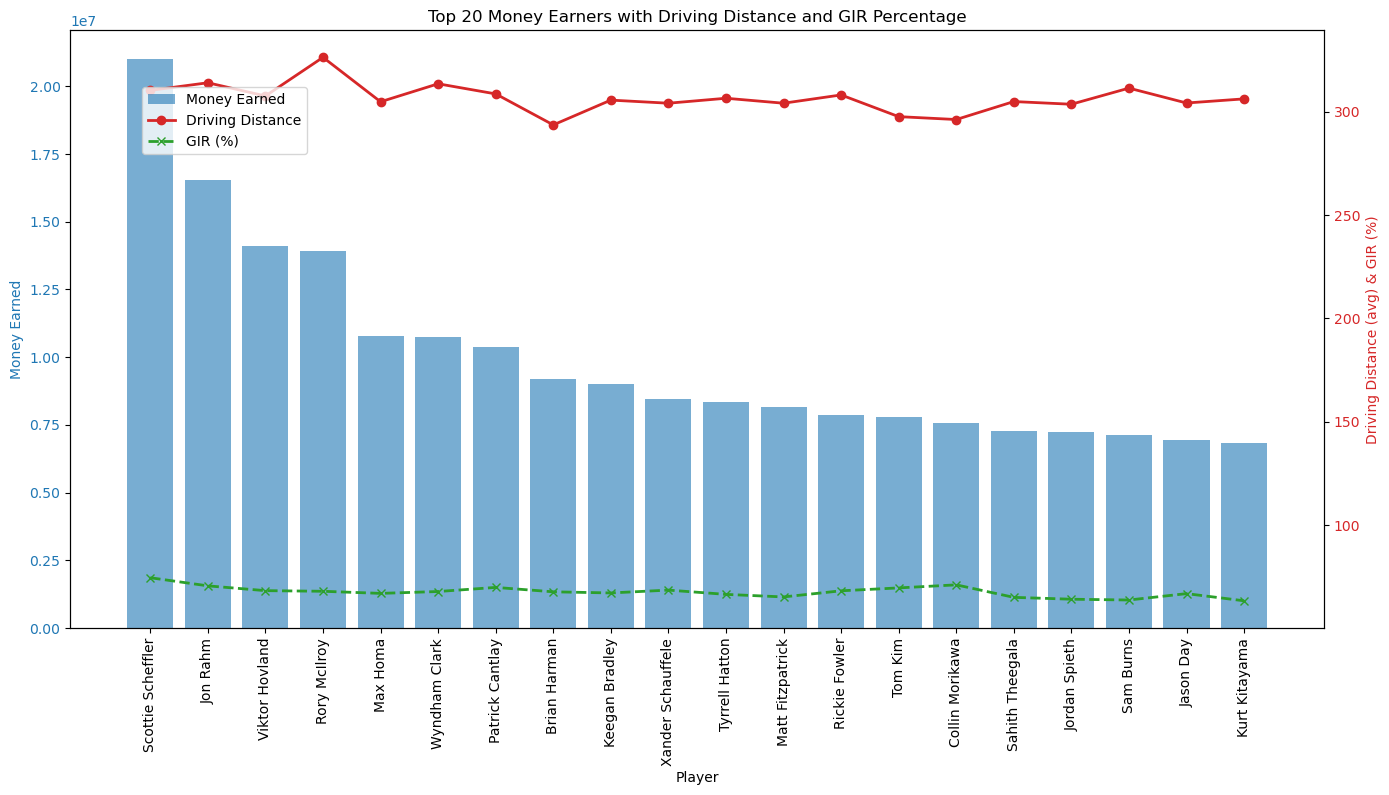

In [4]:
import matplotlib.pyplot as plt

# Get the top 20 money earners
top_20 = merged_df.nlargest(20, 'MONEY')

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

color = 'tab:blue'
ax1.set_xlabel('Player')
ax1.set_ylabel('Money Earned', color=color)
ax1.bar(top_20['PLAYER'], top_20['MONEY'], color=color, alpha=0.6, label='Money Earned')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Driving Distance (avg) & GIR (%)', color=color)
ax2.plot(top_20['PLAYER'], top_20['DRIVING_DISTANCE'], color='tab:red', marker='o', linestyle='-', linewidth=2, label='Driving Distance')
ax2.plot(top_20['PLAYER'], top_20['GIR_PERCENTAGE']*100, color='tab:green', marker='x', linestyle='--', linewidth=2, label='GIR (%)')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.title('Top 20 Money Earners with Driving Distance and GIR Percentage')
plt.show()


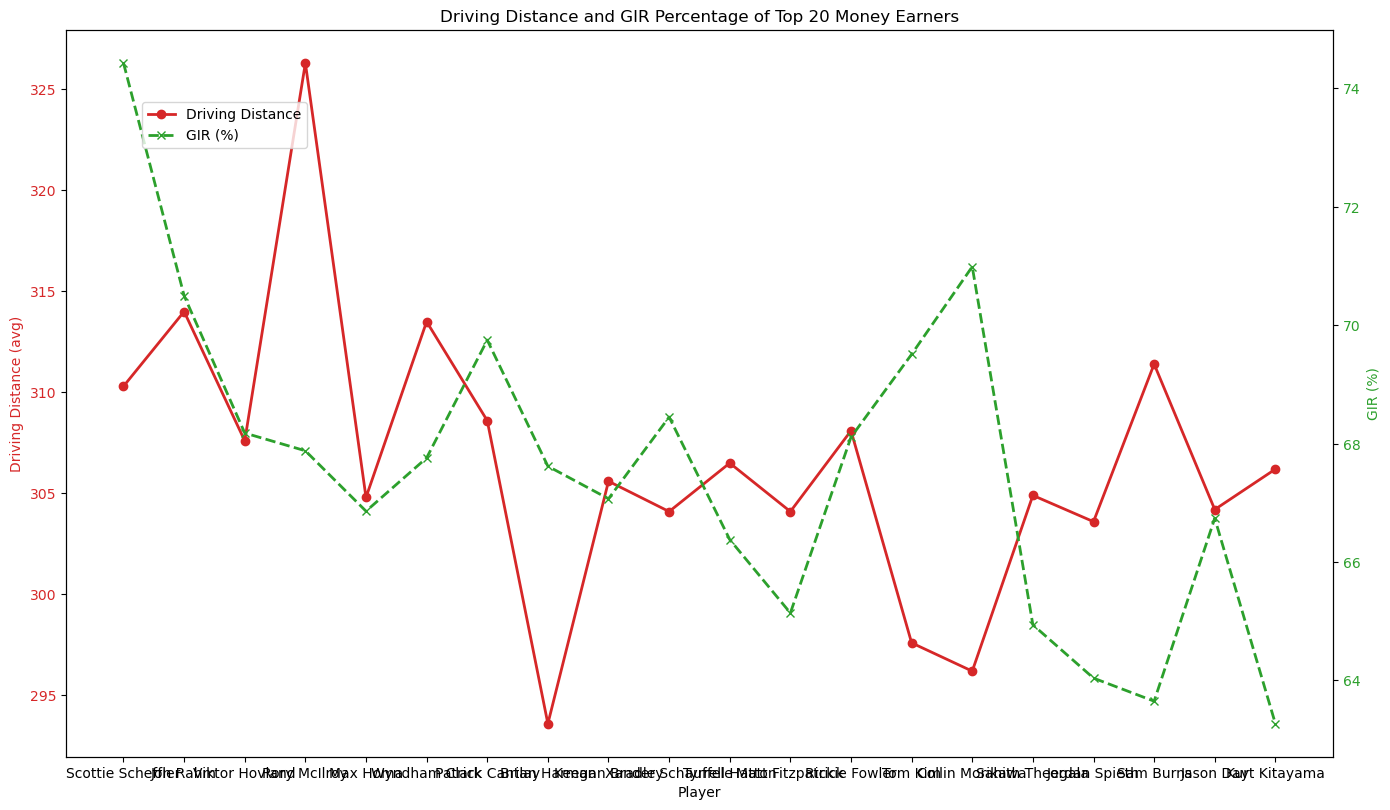

In [7]:
# Plotting Driving Distance and GIR Percentage for the Top 20
fig, ax2 = plt.subplots(figsize=(14, 8))
color = 'tab:red'
ax2.set_xlabel('Player')
ax2.set_ylabel('Driving Distance (avg)', color=color)
ax2.plot(top_20['PLAYER'], top_20['DRIVING_DISTANCE'], color='tab:red', marker='o', linestyle='-', linewidth=2, label='Driving Distance')
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax2.twinx()
color = 'tab:green'
ax3.set_ylabel('GIR (%)', color=color)
ax3.plot(top_20['PLAYER'], top_20['GIR_PERCENTAGE']*100, color=color, marker='x', linestyle='--', linewidth=2, label='GIR (%)')
ax3.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.title('Driving Distance and GIR Percentage of Top 20 Money Earners')
plt.show()


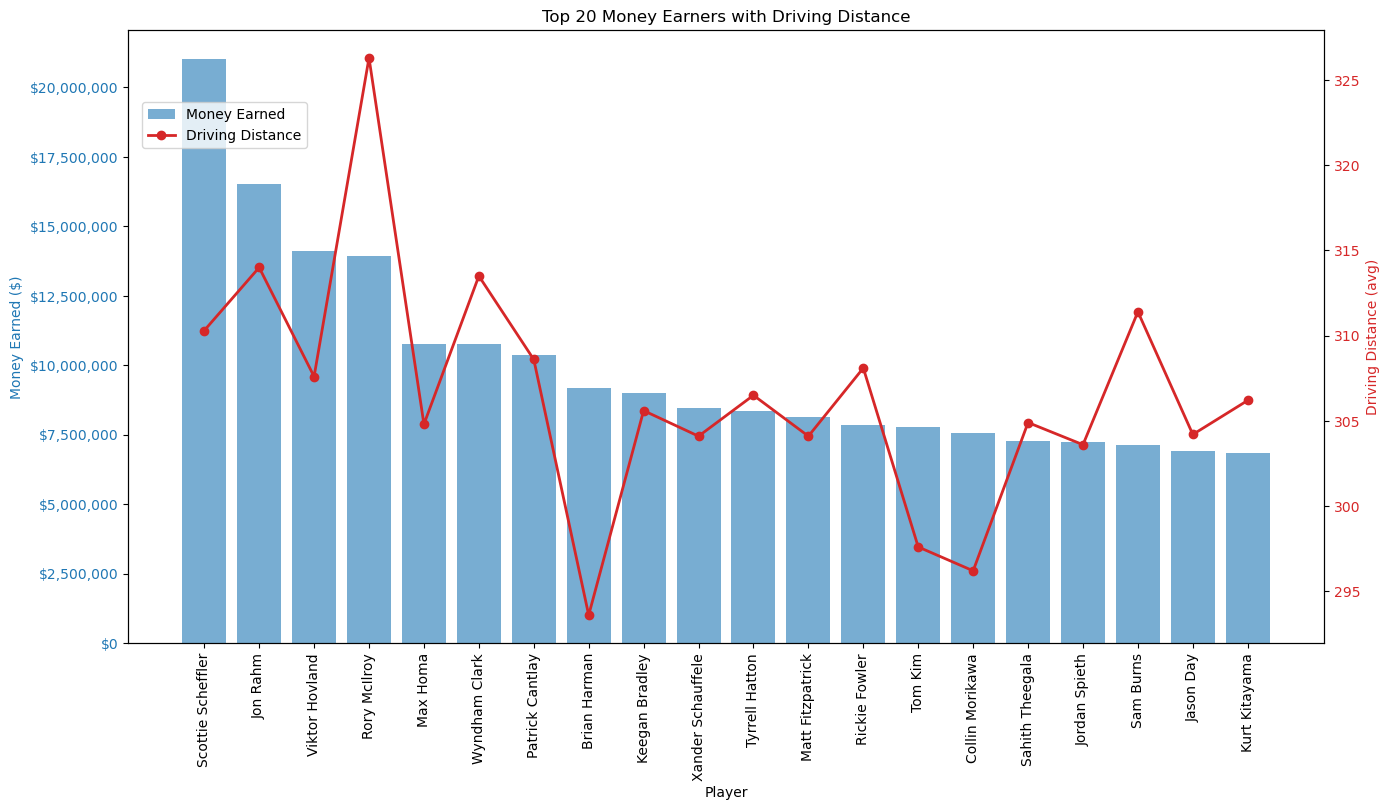

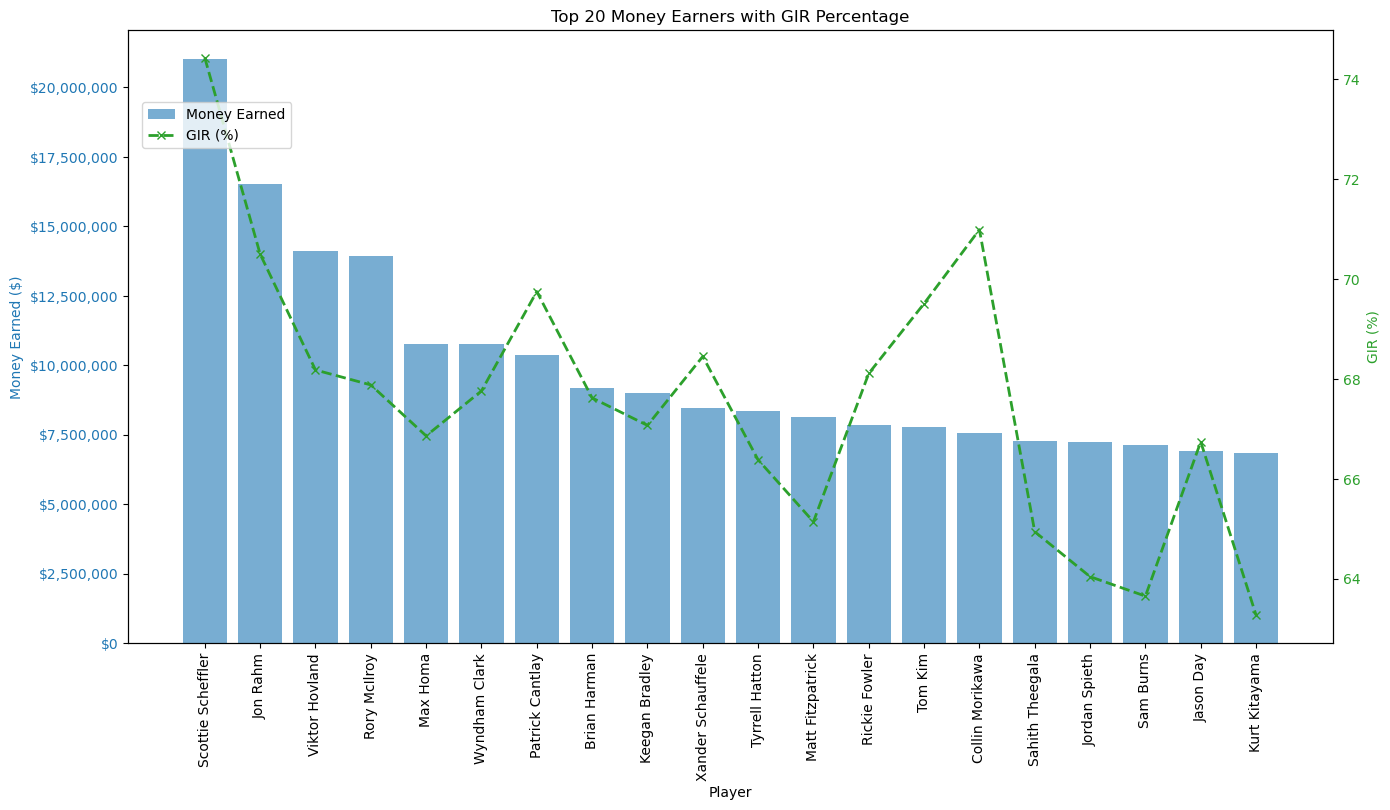

In [9]:
# Plot 1: Money Earned and Driving Distance
fig, ax1 = plt.subplots(figsize=(14, 8))
color = 'tab:blue'
ax1.set_xlabel('Player')
ax1.set_ylabel('Money Earned ($)', color=color)
ax1.bar(top_20['PLAYER'], top_20['MONEY'], color=color, alpha=0.6, label='Money Earned')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=90)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Driving Distance (avg)', color=color)
ax2.plot(top_20['PLAYER'], top_20['DRIVING_DISTANCE'], color=color, marker='o', linestyle='-', linewidth=2, label='Driving Distance')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.title('Top 20 Money Earners with Driving Distance')
plt.show()

# Plot 2: Money Earned and GIR Percentage
fig, ax3 = plt.subplots(figsize=(14, 8))
color = 'tab:blue'
ax3.set_xlabel('Player')
ax3.set_ylabel('Money Earned ($)', color=color)
ax3.bar(top_20['PLAYER'], top_20['MONEY'], color=color, alpha=0.6, label='Money Earned')
ax3.tick_params(axis='y', labelcolor=color)
ax3.tick_params(axis='x', rotation=90)
ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax4.set_ylabel('GIR (%)', color=color)
ax4.plot(top_20['PLAYER'], top_20['GIR_PERCENTAGE']*100, color=color, marker='x', linestyle='--', linewidth=2, label='GIR (%)')
ax4.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.title('Top 20 Money Earners with GIR Percentage')
plt.show()
